# Exoplanet-stars detection
In this notebook, we will analyze the light-intensity time series of stars in order to detect whether it has exoplanets or not.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.ndimage

In [3]:
train = pd.read_csv('../exostar/data/exoTrain.csv')
test =  pd.read_csv('../exostar/data/exoTest.csv')

In [4]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [5]:
train.loc[1]

LABEL          2.00
FLUX.1       -38.88
FLUX.2       -33.83
FLUX.3       -58.54
FLUX.4       -40.09
FLUX.5       -79.31
FLUX.6       -72.81
FLUX.7       -86.55
FLUX.8       -85.33
FLUX.9       -83.97
FLUX.10      -73.38
FLUX.11      -86.51
FLUX.12      -74.97
FLUX.13      -73.15
FLUX.14      -86.13
FLUX.15      -76.57
FLUX.16      -61.27
FLUX.17      -37.23
FLUX.18      -48.53
FLUX.19      -30.96
FLUX.20       -8.14
FLUX.21       -5.54
FLUX.22       15.79
FLUX.23       45.71
FLUX.24       10.61
FLUX.25       40.66
FLUX.26       16.70
FLUX.27       15.18
FLUX.28       11.98
FLUX.29     -203.70
              ...  
FLUX.3168    -58.01
FLUX.3169    -30.92
FLUX.3170    -13.42
FLUX.3171    -13.98
FLUX.3172     -5.43
FLUX.3173      8.71
FLUX.3174      1.80
FLUX.3175     36.59
FLUX.3176     -9.80
FLUX.3177    -19.53
FLUX.3178    -19.53
FLUX.3179    -24.32
FLUX.3180    -23.88
FLUX.3181    -33.07
FLUX.3182     -9.03
FLUX.3183      3.75
FLUX.3184     11.61
FLUX.3185    -12.66
FLUX.3186     -5.69


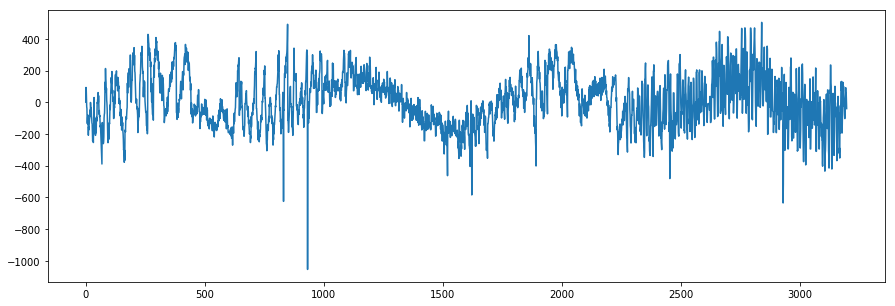

In [13]:
Y= train.loc[0]
X= np.arange(len (Y))
plt.figure(figsize=(15,5))
plt.plot(X,Y)
plt.show()

Explore which stars have exoplanets

In [7]:
z=train[train.LABEL==2]
z

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


Remove Outliers from signals.

In [20]:
Z=scipy.ndimage.filters.median_filter(Y, size=100, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)

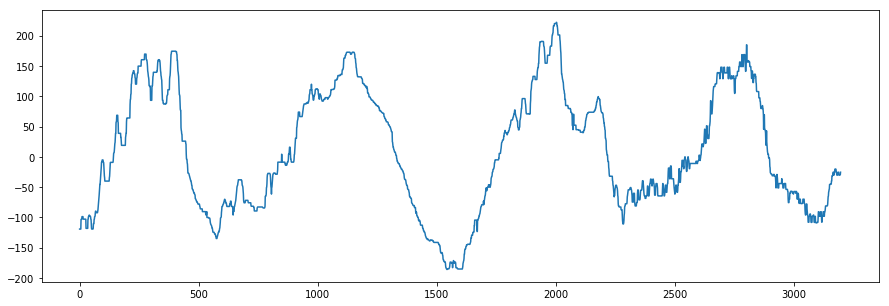

In [21]:

X= np.arange(len (Z))
plt.figure(figsize=(15,5))
plt.plot(X,Z)
plt.show()

In [8]:
train_normal= train.div(train.sum(axis=1),axis=0)
#No sirve así

In [9]:
train_normal.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.000063,0.002949,0.002634,0.000632,-0.000848,-0.001243,-0.003919,-0.004248,-0.003025,-0.002510,...,-0.002453,-0.003210,-0.003210,0.000790,0.001526,0.002908,0.001236,0.001930,0.000160,-0.001242
1,-0.000084,0.001637,0.001425,0.002465,0.001688,0.003340,0.003066,0.003645,0.003594,0.003536,...,0.000138,0.001356,0.001356,0.001048,0.000205,-0.000032,0.000493,-0.000272,-0.000674,-0.000839
2,0.000076,0.020343,0.020469,0.019621,0.018979,0.017433,0.017798,0.017741,0.018577,0.016674,...,-0.002738,0.000508,0.000508,-0.001142,-0.000797,0.000193,-0.000451,-0.001104,-0.002674,-0.003692
3,-0.000135,-0.021983,-0.023388,-0.020356,-0.020072,-0.021392,-0.021053,-0.021701,-0.020959,-0.021034,...,-0.000384,0.000251,0.000251,-0.002023,-0.001349,0.000853,0.000590,0.001165,0.001168,-0.000941
4,-0.000044,0.024321,0.024439,0.024579,0.024055,0.023230,0.022723,0.021929,0.022465,0.021737,...,0.013056,0.008823,0.008823,0.007847,0.009748,0.009633,0.008780,0.008449,0.009045,0.011214


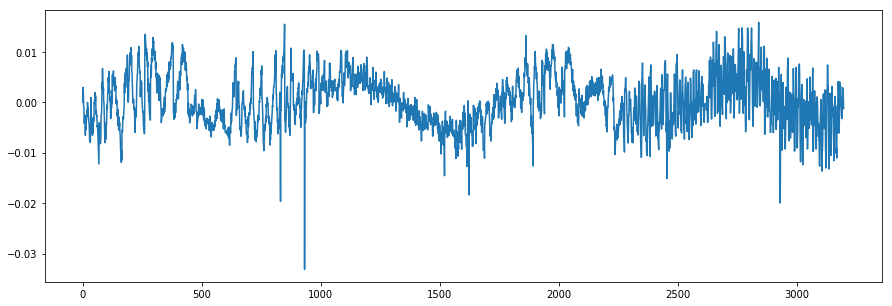

In [11]:
Y= train_normal.loc[0]
X= np.arange(len (Y))
plt.figure(figsize=(15,5))
plt.plot(X,Y)
plt.show()

In [12]:
#juntar cada 3 o cada 6